In [1]:
from sklearn import datasets
from polyssifier import poly, plot
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons, make_classification
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

(500, 2)
(500,)
                               mean       std       min       max
Nearest Neighbors   train  0.941829  0.014116  0.925562  0.950859
                    test   0.926361  0.024654  0.908913  0.954565
SVM                 train  0.924941  0.016512  0.908351  0.941375
                    test   0.920641  0.029582  0.893163  0.951952
Linear SVM          train  0.911191  0.012160  0.900355  0.924343
                    test   0.907054  0.026513  0.882421  0.935114
Decision Tree       train  1.000000  0.000000  1.000000  1.000000
                    test   0.788033  0.022268  0.771084  0.813253
Random Forest       train  0.999641  0.000341  0.999301  0.999982
                    test   0.892316  0.029680  0.871244  0.926259
Logistic Regression train  0.910187  0.013181  0.897773  0.924020
                    test   0.907500  0.025434  0.885034  0.935114
Naive Bayes         train  0.911109  0.011787  0.900391  0.923733
                    test   0.906923  0.025339  0.884453  0.9

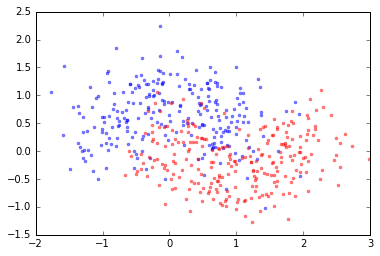

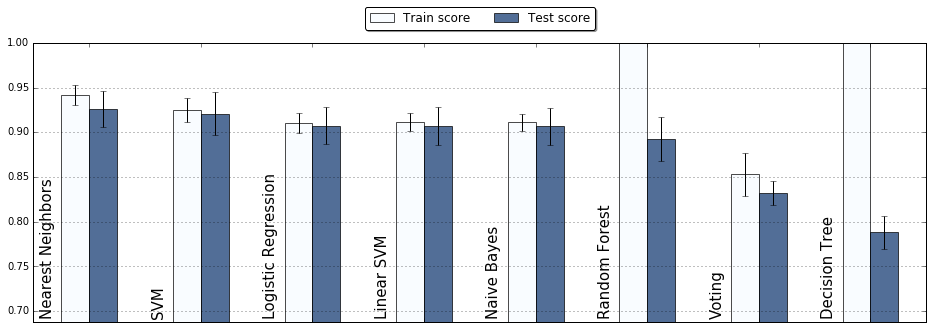

In [2]:
data, label = make_moons(n_samples=500, noise=0.4)
print(data.shape)
print(label.shape)

label0 = np.where(label==0)[0]
label1 = np.where(label==1)[0]

plt.plot(data[label0,0], data[label0,1],'.', alpha=.5);
plt.plot(data[label1,0], data[label1,1],'r.', alpha=.5);
scores, confusions, predictions, probs = poly(data,label, n_folds=3, verbose=True, save=False, scale=True,
                                              feature_selection=False, scoring='auc', concurrency=1, 
                                              exclude= ['Multilayer Perceptron'])
plot(scores)

In [3]:
scores


Nearest Neighbors                 SVM           Linear SVM            \
              train      test     train      test      train      test   
0          0.949067  0.915604  0.925098  0.916808   0.908876  0.903628   
1          0.925562  0.954565  0.908351  0.951952   0.900355  0.935114   
2          0.950859  0.908913  0.941375  0.893163   0.924343  0.882421   

  Decision Tree           Random Forest           Logistic Regression  \
          train      test         train      test               train   
0             1  0.779762      0.999982  0.871244            0.908768   
1             1  0.813253      0.999301  0.926259            0.897773   
2             1  0.771084      0.999641  0.879445             0.92402   

            Naive Bayes              Voting            
       test       train      test     train      test  
0  0.902353    0.909203  0.901927  0.831325  0.845238  
1  0.935114    0.900391  0.934388  0.841317  0.837349  
2  0.885034    0.923733  0.884453  0.886228  0.813253

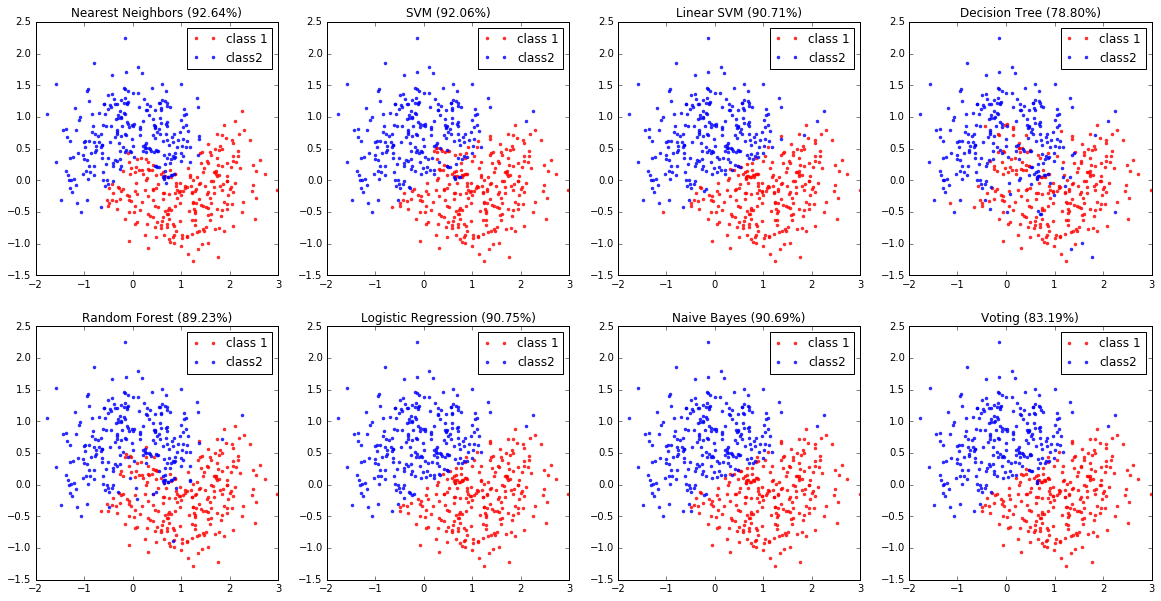

In [4]:
plt.figure(figsize=(20, 10))
for n, (key, pred) in enumerate(predictions.items()):
    plt.subplot(2,4,n+1)
    missclass = np.where(pred==0)[0]
    corrclass = np.where(pred==1)[0]
    plt.plot(data[corrclass,0], data[corrclass,1],'r.', alpha=0.8);
    plt.plot(data[missclass,0], data[missclass,1],'b.', alpha=0.8);
    plt.legend(['class 1', 'class2'])
    plt.title('{0} ({1:.2f}%)'.format(key, 100*np.mean(scores[key]['test']) ))

Using Theano backend.
[polyssifier:INFO]:Initialization, done.
[polyssifier:INFO]:Training Multilayer Perceptron 0
[polyssifier:INFO]:Multilayer Perceptron      0: Train 0.79/Test 0.77, 61.68 sec
[polyssifier:INFO]:Training Multilayer Perceptron 1
[polyssifier:INFO]:Multilayer Perceptron      1: Train 0.78/Test 0.80, 67.99 sec
[polyssifier:INFO]:Training Multilayer Perceptron 2
[polyssifier:INFO]:Multilayer Perceptron      2: Train 0.80/Test 0.79, 54.92 sec
[polyssifier:INFO]:Training Nearest Neighbors 0
[polyssifier:INFO]:Nearest Neighbors          0: Train 0.94/Test 0.92, 0.23 sec
[polyssifier:INFO]:Training Nearest Neighbors 1
[polyssifier:INFO]:Nearest Neighbors          1: Train 0.94/Test 0.93, 0.22 sec
[polyssifier:INFO]:Training Nearest Neighbors 2
[polyssifier:INFO]:Nearest Neighbors          2: Train 0.93/Test 0.90, 0.22 sec
[polyssifier:INFO]:Training SVM 0
[polyssifier:INFO]:SVM                        0: Train 0.94/Test 0.93, 1.18 sec
[polyssifier:INFO]:Training SVM 1
[polys

                                 mean       std       min       max
Multilayer Perceptron train  0.791424  0.011075  0.782988  0.803966
                      test   0.788703  0.015716  0.772662  0.804073
Nearest Neighbors     train  0.938285  0.006350  0.931261  0.943619
                      test   0.913530  0.016256  0.896284  0.928571
SVM                   train  0.941849  0.007125  0.936891  0.950014
                      test   0.922365  0.025226  0.893889  0.941910
Linear SVM            train  0.806899  0.013707  0.795505  0.822110
                      test   0.794775  0.026523  0.765133  0.816265
Decision Tree         train  1.000000  0.000000  1.000000  1.000000
                      test   0.798049  0.029198  0.765060  0.820568
Random Forest         train  0.999952  0.000083  0.999857  1.000000
                      test   0.907301  0.019858  0.892800  0.929934
Logistic Regression   train  0.802294  0.007167  0.795397  0.809703
                      test   0.798897  0.018550 

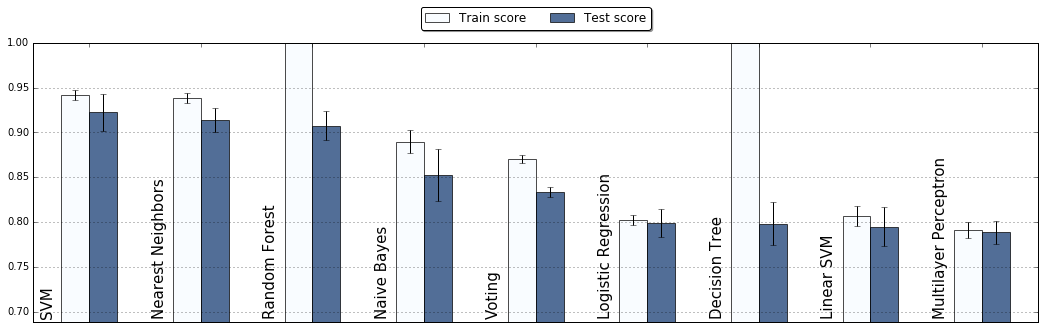

In [5]:
data, label = make_classification(n_samples=500, n_features=20,
                                      n_informative=5, n_redundant=2,
                                      n_repeated=0, n_classes=2,
                                      n_clusters_per_class=2, weights=None,
                                      flip_y=0.01, class_sep=1.0,
                                      hypercube=True, shift=0.0,
                                      scale=1.0, shuffle=True,
                                      random_state=None)
scores, confusions, predictions, probas = poly(data, label, n_folds=3, verbose=True,
                                       feature_selection=True, save=False, concurrency=1)
plot(scores)

In [6]:
for key, val in confusions.items():
    print(key)
    print(val)

Multilayer Perceptron
[[ 161.   90.]
 [  50.  199.]]
Linear SVM
[[ 182.   69.]
 [  67.  182.]]
Voting
[[ 224.   27.]
 [  56.  193.]]
SVM
[[ 213.   38.]
 [  37.  212.]]
Nearest Neighbors
[[ 217.   34.]
 [  48.  201.]]
Decision Tree
[[ 199.   52.]
 [  49.  200.]]
Naive Bayes
[[ 191.   60.]
 [  58.  191.]]
Logistic Regression
[[ 180.   71.]
 [  62.  187.]]
Random Forest
[[ 217.   34.]
 [  57.  192.]]


In [7]:
probs.head()

,Nearest Neighbors,SVM,Linear SVM,Decision Tree,Random Forest,Logistic Regression,Naive Bayes,Voting
0,0.45,0.527632,-0.075378,0.0,0.2500,0.504162,0.579607,0.0
1,0.55,0.472368,1.196592,1.0,0.7500,0.495838,0.420393,1.0
2,0.10,0.010877,0.811964,0.0,0.0625,0.447125,0.019768,1.0
3,0.90,0.989123,-0.766732,1.0,0.9375,0.552875,0.980232,0.0
4,0.05,0.025526,0.305867,0.0,0.0000,0.464406,0.070416,1.0
